# Basic setups

In [ ]:
%load_ext autoreload
%autoreload 2

import os
import re
import shutil
import random
import pprint
import itertools
import functools
import collections

import Bio
import Bio.SeqIO
import pysam
import pyranges as pr
import numpy as np
import pandas as pd
# pd.options.display.max_rows = 10
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import seaborn as sns
# import scipy
# import sklearn

import handygenome

In [ ]:
# from handygenome import common
# from handygenome.common import ChromDict
# from handygenome.variant.vcfspec import Vcfspec
# from handygenome.sv.breakends import Breakends
# from handygenome.variant.variantplus import VariantPlus, VariantPlusList
# from handygenome.igvhandle import IGVHandle

# import handygenome.tools as tools
# import handygenome.publicdb.ncbi as libncbi
# import handygenome.publicdb.ncbi_cache as libncbicache
# import handygenome.refgenome as refgenome
# import handygenome.logutils as logutils

from handygenome.genomedf import GenomeDataFrame

In [ ]:
gdf1 = GenomeDataFrame.from_data(chroms=['1', '1', '1'], starts=[0, 1, 2], ends=[10, 11, 12], refver='hg19')
gdf2 = GenomeDataFrame.from_data(chroms=['1', '1', '1'], starts=[5, 2, 10], ends=[10, 8, 12], refver='hg19')

In [ ]:
right_gr = pr.from_dict({'Chromosome': ['1'], 'Start': [5], 'End': [8]})

In [ ]:
isec_gdf = gdf1.intersect(gdf2)

In [129]:
isec_gdf.df

,Chromosome,Start,End
0,1,2,8
1,1,5,10
2,1,2,8
3,1,5,10
4,1,10,11
5,1,2,8
6,1,5,10
7,1,10,12


In [130]:
isec_gdf._df_lastaccess

datetime.datetime(2023, 8, 28, 21, 30, 32, 468203)

In [131]:
isec_gdf.gr

,Chromosome,Start,End
0,1,2,8
1,1,5,10
2,1,2,8
3,1,5,10
4,1,10,11
5,1,2,8
6,1,5,10
7,1,10,12


In [132]:
isec_gdf._gr_lastaccess

datetime.datetime(2023, 8, 28, 21, 30, 35, 529890)

In [133]:
isec_gdf.sort()

In [134]:
isec_gdf.df

,Chromosome,Start,End
0,1,2,8
1,1,2,8
2,1,2,8
3,1,5,10
4,1,5,10
5,1,5,10
6,1,10,11
7,1,10,12


In [135]:
isec_gdf.gr

,Chromosome,Start,End
0,1,2,8
1,1,5,10
2,1,2,8
3,1,5,10
4,1,10,11
5,1,2,8
6,1,5,10
7,1,10,12


In [3]:
libncbicache.get_gff_path('GRCh37', 'Homo_sapiens')

'/home/users/pjh/.handygenome/data/ncbi_files/Homo_sapiens/GRCh37/gff'

In [6]:
refgenome.get_fasta('banana')

In [5]:
libncbicache.get_fasta_path('GRCh38', 'Homo_sapiens')

'/home/users/pjh/.handygenome/data/ncbi_files/Homo_sapiens/GRCh38/genome_fasta'

In [41]:
refgenome.get_fasta('hg19')

In [106]:
tools.check_bgzipped('/home/users/pjh/practice/fastafetch/bg_compressed.fasta.gz')

True

In [107]:
fa1 = pysam.FastaFile('/home/users/data/01_reference/human_g1k_v37/human_g1k_v37.fa')
fa2 = pysam.FastaFile('/home/users/pjh/practice/fastafetch/bg_compressed.fasta.gz')

In [110]:
import random

targets = list()
for _ in range(100):
    chrom = random.choice(fa1.references[:24])
    chromlen = fa1.lengths[fa1.references.index(chrom)]
    start0 = random.randrange(0, chromlen)
    end0 = random.randrange(start0 + 1, min(start0 + 1 + 1000, chromlen))
    targets.append((chrom, start0, end0))

In [116]:
%%timeit -n1 -r10
for x in targets:
    fa1.fetch(*x)

1.68 ms ± 95.2 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [119]:
%%timeit -n1 -r10
for x in targets:
    fa2.fetch(*x)

20.5 ms ± 67.2 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [74]:
import handygenome.fastahandler as fastahandler

in_fa_path = '/home/users/data/01_reference/human_g1k_v37/human_g1k_v37.fasta'
out_fa_text_path = '/home/users/pjh/practice/fastafetch/plain.fa'
out_fa_zip_path = '/home/users/pjh/practice/fastafetch/zip.fa.gz'

fastahandler.rename_fasta_compress(in_fa_path, out_fa_path, chromconv, index=True)

[W::fai_insert_index] Ignoring duplicate sequence "ABCD_ST-E00127:1038:H7V3TCCX2:3:1217:14996:50076" at byte offset 6155


In [10]:
refgenome.REFVERINFO.get_default_fasta_path('hg19')

[KST 2023-08-02 21:47:55] Downloading fasta file for reference version "GRCh37"
[KST 2023-08-02 21:47:57] Trying to open url 'https://ftp.ncbi.nlm.nih.gov/genomes/refseq/vertebrate_mammalian/Homo_sapiens/all_assembly_versions/GCF_000001405.25_GRCh37.p13/GCF_000001405.25_GRCh37.p13_rna_from_genomic.fna.gz'
[KST 2023-08-02 21:47:58] Succeeded to open url 'https://ftp.ncbi.nlm.nih.gov/genomes/refseq/vertebrate_mammalian/Homo_sapiens/all_assembly_versions/GCF_000001405.25_GRCh37.p13/GCF_000001405.25_GRCh37.p13_rna_from_genomic.fna.gz'
[KST 2023-08-02 21:48:05] Making fasta index file
[E::fai_build3_core] Cannot index files compressed with gzip, please use bgzip


SamtoolsError: 'samtools returned with error 1: stdout=, stderr=[faidx] Could not build fai index /home/users/pjh/scripts/python_genome_package_dev/data/refseq_fasta/Homo_sapiens/GRCh37.fasta.fai\n'

In [7]:
libncbi.get_geneset_path('GRCh38', 'Homo_sapiens')

[KST 2023-08-02 20:59:51] Downloading gff file for reference version "GRCh38"
[KST 2023-08-02 20:59:55] Trying to open url 'https://ftp.ncbi.nlm.nih.gov/genomes/refseq/vertebrate_mammalian/Homo_sapiens/all_assembly_versions/GCF_000001405.40_GRCh38.p14/GCF_000001405.40_GRCh38.p14_genomic.gff.gz'
[KST 2023-08-02 21:00:01] Succeeded to open url 'https://ftp.ncbi.nlm.nih.gov/genomes/refseq/vertebrate_mammalian/Homo_sapiens/all_assembly_versions/GCF_000001405.40_GRCh38.p14/GCF_000001405.40_GRCh38.p14_genomic.gff.gz'


'/home/users/pjh/scripts/python_genome_package_dev/data/refseq_geneset/Homo_sapiens/GRCh38.geneset.gff.gz'

In [26]:
fasta = pysam.FastaFile('/home/users/data/01_reference/human_g1k_v37/human_g1k_v37.fasta')

In [28]:
refgenome.REFVERINFO.get_assemblyspec('hg19').get_chrom_converter(fasta.references, fasta.lengths)

{'chr1': '1',
 'CM000663.1': '1',
 '1': '1',
 'NC_000001.10': '1',
 '2': '2',
 'chr2': '2',
 'CM000664.1': '2',
 'NC_000002.11': '2',
 '3': '3',
 'chr3': '3',
 'CM000665.1': '3',
 'NC_000003.11': '3',
 '4': '4',
 'chr4': '4',
 'CM000666.1': '4',
 'NC_000004.11': '4',
 'chr5': '5',
 '5': '5',
 'CM000667.1': '5',
 'NC_000005.9': '5',
 'CM000668.1': '6',
 'NC_000006.11': '6',
 '6': '6',
 'chr6': '6',
 'chr7': '7',
 'CM000669.1': '7',
 '7': '7',
 'NC_000007.13': '7',
 'CM000670.1': '8',
 'NC_000008.10': '8',
 'chr8': '8',
 '8': '8',
 '9': '9',
 'CM000671.1': '9',
 'NC_000009.11': '9',
 'chr9': '9',
 'NC_000010.10': '10',
 '10': '10',
 'chr10': '10',
 'CM000672.1': '10',
 'NC_000011.9': '11',
 '11': '11',
 'chr11': '11',
 'CM000673.1': '11',
 'NC_000012.11': '12',
 'CM000674.1': '12',
 '12': '12',
 'chr12': '12',
 'NC_000013.10': '13',
 'chr13': '13',
 'CM000675.1': '13',
 '13': '13',
 '14': '14',
 'NC_000014.8': '14',
 'CM000676.1': '14',
 'chr14': '14',
 '15': '15',
 'NC_000015.9': '15',


In [24]:
refgenome.REFVERINFO.get_assemblyspec('hg19').get_alias_groups()

[{'1', 'CM000663.1', 'NC_000001.10', 'chr1'},
 {'2', 'CM000664.1', 'NC_000002.11', 'chr2'},
 {'3', 'CM000665.1', 'NC_000003.11', 'chr3'},
 {'4', 'CM000666.1', 'NC_000004.11', 'chr4'},
 {'5', 'CM000667.1', 'NC_000005.9', 'chr5'},
 {'6', 'CM000668.1', 'NC_000006.11', 'chr6'},
 {'7', 'CM000669.1', 'NC_000007.13', 'chr7'},
 {'8', 'CM000670.1', 'NC_000008.10', 'chr8'},
 {'9', 'CM000671.1', 'NC_000009.11', 'chr9'},
 {'10', 'CM000672.1', 'NC_000010.10', 'chr10'},
 {'11', 'CM000673.1', 'NC_000011.9', 'chr11'},
 {'12', 'CM000674.1', 'NC_000012.11', 'chr12'},
 {'13', 'CM000675.1', 'NC_000013.10', 'chr13'},
 {'14', 'CM000676.1', 'NC_000014.8', 'chr14'},
 {'15', 'CM000677.1', 'NC_000015.9', 'chr15'},
 {'16', 'CM000678.1', 'NC_000016.9', 'chr16'},
 {'17', 'CM000679.1', 'NC_000017.10', 'chr17'},
 {'18', 'CM000680.1', 'NC_000018.9', 'chr18'},
 {'19', 'CM000681.1', 'NC_000019.9', 'chr19'},
 {'20', 'CM000682.1', 'NC_000020.10', 'chr20'},
 {'21', 'CM000683.1', 'NC_000021.8', 'chr21'},
 {'22', 'CM000684.

In [8]:
import pysam
gff_ens = pysam.TabixFile()

In [3]:
FASTA_HG19 = common.DEFAULT_FASTAS['hg19']
FASTA_HG38 = common.DEFAULT_FASTAS['hg38']
CHROMDICT_HG19 = common.DEFAULT_CHROMDICTS['hg19']
CHROMDICT_HG38 = common.DEFAULT_CHROMDICTS['hg38']

In [4]:
igv = IGVHandle(60387)

In [5]:
def perfcheck(func, *args, **kwargs):
    import time
    t1 = time.perf_counter()
    result = func(*args, **kwargs)
    t2 = time.perf_counter()
    print(f'{t2 - t1} sec')
    
    return result

# Scratches

In [57]:
import handygenome.publicdb.ncbi as libncbi
import handygenome.assemblyspec as libassemblyspec

[KST 2023-07-07 18:45:38] Trying to open url 'https://ftp.ncbi.nlm.nih.gov/genomes/refseq/vertebrate_mammalian/Homo_sapiens/all_assembly_versions/GCF_000001405.10_NCBI34/GCF_000001405.10_NCBI34_assembly_report.txt'
[KST 2023-07-07 18:45:39] Succeeded to open url 'https://ftp.ncbi.nlm.nih.gov/genomes/refseq/vertebrate_mammalian/Homo_sapiens/all_assembly_versions/GCF_000001405.10_NCBI34/GCF_000001405.10_NCBI34_assembly_report.txt'
[KST 2023-07-07 18:45:39] Trying to open url 'https://ftp.ncbi.nlm.nih.gov/genomes/refseq/vertebrate_mammalian/Homo_sapiens/all_assembly_versions/GCF_000001405.11_NCBI35/GCF_000001405.11_NCBI35_assembly_report.txt'
[KST 2023-07-07 18:45:40] Succeeded to open url 'https://ftp.ncbi.nlm.nih.gov/genomes/refseq/vertebrate_mammalian/Homo_sapiens/all_assembly_versions/GCF_000001405.11_NCBI35/GCF_000001405.11_NCBI35_assembly_report.txt'
[KST 2023-07-07 18:45:40] Trying to open url 'https://ftp.ncbi.nlm.nih.gov/genomes/refseq/vertebrate_mammalian/Homo_sapiens/all_assemb

In [60]:
libncbi.get_dbsnp_urls()

{'GCF_000001405.25': {'vcf_md5': 'https://ftp.ncbi.nlm.nih.gov/snp/latest_release/VCF/GCF_000001405.25.gz.md5',
  'vcf': 'https://ftp.ncbi.nlm.nih.gov/snp/latest_release/VCF/GCF_000001405.25.gz'},
 'GCF_000001405.40': {'vcf_md5': 'https://ftp.ncbi.nlm.nih.gov/snp/latest_release/VCF/GCF_000001405.40.gz.md5',
  'vcf': 'https://ftp.ncbi.nlm.nih.gov/snp/latest_release/VCF/GCF_000001405.40.gz'}}

In [138]:
import pysam
vcf = pysam.VariantFile("https://ftp.ncbi.nih.gov/snp/latest_release/VCF/GCF_000001405.25.gz")

In [152]:
for rec in vcf.header.records:
    if rec.key == 'dbSNP_BUILD_ID':
        print(rec.value)
        print(type(rec.value))

156
<class 'str'>


In [156]:
dic = dict()
for rec in (vcf.header.records):
    if rec.type == 'GENERIC':
        dic[rec.key] = rec.value

In [157]:
dic

{'fileformat': 'VCFv4.2',
 'fileDate': '20221104',
 'source': 'dbSNP',
 'dbSNP_BUILD_ID': '156',
 'reference': 'GRCh37.p13',
 'phasing': 'partial'}

In [161]:
help(vcf.header)

Help on VariantHeader object:

class VariantHeader(builtins.object)
 |  VariantHeader()
 |  header information for a :class:`VariantFile` object
 |  
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      True if self else False
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __reduce__ = __reduce_cython__(...)
 |      VariantHeader.__reduce_cython__(self)
 |  
 |  __setstate__ = __setstate_cython__(...)
 |      VariantHeader.__setstate_cython__(self, __pyx_state)
 |  
 |  __str__(self, /)
 |      Return str(self).
 |  
 |  add_line(...)
 |      VariantHeader.add_line(self, line)
 |      Add a metadata line to this header
 |  
 |  add_meta(...)
 |      VariantHeader.add_meta(self, key, value=None, items=None)
 |      Add metadata to this header
 |  
 |  add_record(...)
 |      VariantHeader.add_record(self, VariantHeaderRecord record)
 |      Add an existing :class:`VariantHeaderRecord` to this header
 | 

[autoreload of handygenome.tools.database_converter.dbsnp_converter failed: Traceback (most recent call last):
  File "/home/users/pjh/tools/miniconda/221104/miniconda3/envs/genome_v7/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/home/users/pjh/tools/miniconda/221104/miniconda3/envs/genome_v7/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/home/users/pjh/tools/miniconda/221104/miniconda3/envs/genome_v7/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241,

In [108]:
left_nrow = 3
right_nrow = 10

left_df = pd.DataFrame.from_dict({
    # 'Chromosome': pd.Categorical(np.random.choice([str(x) for x in range(1, 6)], left_nrow)),
    'Chromosome': pd.Categorical(np.random.choice([str(x) for x in range(1, 2)], left_nrow)),
    'Start': np.random.randint(0, 10000, left_nrow),
    'End': np.random.randint(15000, 30000, left_nrow),
    'val1': np.random.normal(0, 1, left_nrow),
    'val2': np.random.normal(0, 1, left_nrow),
})
left_gr = pr.PyRanges(left_df).sort()

right_df = pd.DataFrame.from_dict({
    # 'Chromosome': pd.Categorical(np.random.choice([str(x) for x in range(1, 5)], right_nrow)),
    'Chromosome': pd.Categorical(np.random.choice([str(x) for x in range(1, 2)], right_nrow)),
    'Start': np.random.randint(23000, 33000, right_nrow),
    'End': np.random.randint(50000, 60000, right_nrow),
    'val3': np.random.normal(0, 1, right_nrow),
    'val4': np.random.normal(0, 1, right_nrow),
})
right_gr = pr.PyRanges(right_df).sort()

In [125]:
left_df = pd.DataFrame.from_records(
    [
        ['1', 0, 100, 'a'],
    ],
    columns=['Chromosome', 'Start', 'End', 'val'],
)

right_df = pd.DataFrame.from_records(
    [
        ['1', 50, 60, 1],
        ['1', 50, 60, 3],
        ['1', 70, 80, np.nan],
    ],
    columns=['Chromosome', 'Start', 'End', 'val2'],
)

In [126]:
left_df

,Chromosome,Start,End,val
0,1,0,100,a


In [127]:
right_df

,Chromosome,Start,End,val2
0,1,50,60,1.0
1,1,50,60,3.0
2,1,70,80,NaN


In [128]:
import handygenome.pyranges_helper as pyranges_helper

In [131]:
joined = pyranges_helper.join(left_df, right_df, merge='mean', how='left', add_std=True)

In [132]:
joined

,Chromosome,Start,End,val,val2,val2_std
0,1,0,100,a,2.0,1.0


In [133]:
np.std([1, 3])

1.0

In [116]:
joined2 = pyranges_helper.join(left_gr, right_gr, merge='mean', how='left', add_std=True)

In [117]:
joined2

,Chromosome,Start,End,val1,val2,val3,val4,val3_std,val4_std
0,1,1640,24692,2.397871,1.128897,0.653694,0.220985,0.000000,0.000000
1,1,6859,20853,-0.371721,0.470953,NaN,NaN,NaN,NaN
2,1,8451,28003,0.478073,2.031294,0.599619,0.400033,0.465758,0.747817


In [99]:
np.mean(joined['val4'].iloc[:2])

-0.33342639114907086

In [100]:
np.std(joined['val4'].iloc[:2])

1.0569280029347825

# Filtering criteria

In [24]:
sampleid = 'LU-6'

In [25]:
igv.new()
igv.load([BAM_PATHS['normal'][sampleid], BAM_PATHS['tumor'][sampleid]])

OK
OK
OK


In [64]:
nbam_path = BAM_PATHS['normal'][sampleid]
tbam_path = BAM_PATHS['tumor'][sampleid]
nbam = pysam.AlignmentFile(BAM_PATHS['normal'][sampleid])
tbam = pysam.AlignmentFile(BAM_PATHS['tumor'][sampleid])
bam_dict = {'normal': nbam, 'tumor': tbam}

In [66]:
import handygenome.bameditor as bameditor
nbam_avgdepth = bameditor.get_average_depth(nbam)

In [115]:
print(nbam_avgdepth)

38.48206469162919


In [170]:
import handygenome.variant.filter as libfilter
germlinefilter = libfilter.get_preset_filter_germline(
    with_pon=False, 
    cutoff_lower_totalcount=(nbam_avgdepth * 0.5),
    cutoff_upper_totalcount=(nbam_avgdepth * 1.5),
    cutoffs_vaf=(0.2, 0.8),
)

In [117]:
vcfpath = '/home/users/team_projects/Lung_Cancer_Panel_data/03_Data_from_YTKim/06_haplotypecaller/merged_vcfs/LU-6.merged.vcf.gz.strip.n_readstats.vcf.gz'

In [29]:
vplist = VariantPlusList.from_vcf(
    vcf_path, 
    logging_lineno=10000, 
    init_all_attrs=False, 
    vp_init_params=dict(init_readstats=True, sampleid_list=[f'{sampleid}_normal']),
    
    prop=0.01,
    chrom='1',
)

[KST 2023-04-09 23:51:57.098] VariantPlusList: Processing 10,000th line


In [30]:
vplist

<VariantPlusList of length 12255 [
	0	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=13,079, ref='C', alts=('G',)), gene=(alt_index 0: ))>
	1	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=61,350, ref='TA', alts=('T',)), gene=(alt_index 0: ))>
	2	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=66,481, ref='TTTATAGA', alts=('T',)), gene=(alt_index 0: ))>
	3	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=68,635, ref='A', alts=('G',)), gene=(alt_index 0: ))>
	4	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=104,828, ref='C', alts=('T',)), gene=(alt_index 0: ))>
	5	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=105,123, ref='C', alts=('G',)), gene=(alt_index 0: ))>
	6	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=105,700, ref='T', alts=('G',)), gene=(alt_index 0: ))>
	7	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=111,735, ref='C', alts=('A',)), gene=(alt_index 0: ))>
	8	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=113,800, ref='T', alts=('C',)), gene=(alt_index 0: ))>
	9	<VariantPlus(vcfspec=Vcfspec(chrom='1', 

In [157]:
def vpfilter(vp):
    # total_depth = vp.readstats_dict[f'{sampleid}_normal'].get_total_rppcount()
    # return (
    #     (vp.readstats_dict[f'{sampleid}_normal']['recurrent_mNM'][1] > 10)
    #     # ((total_depth > nbam_avgdepth * 1.5) and (total_depth < nbam_avgdepth * 2))
    #     and (germlinefilter.check(vp, sampleid=f'{sampleid}_normal'))
    # )
    # return germlinefilter.check(vp, sampleid=f'{sampleid}_normal')
    vaf = vp.get_vaf(f'{sampleid}_normal')
    return (
        germlinefilter.check(vp, sampleid=f'{sampleid}_normal')
        and (vaf > 0.2 and vaf < 0.25)
    )
    
vplist_filtered = vplist.filter(vpfilter)

In [167]:
print(len(vplist_filtered))

8


In [164]:
# vp = vplist_filtered.sample()
print(vp)
vp.show_igv(igv, bam_dict=bam_dict)
# igv.goto([vp.vcfspec], width=500)
# igv.cmd('collapse')
germlinefilter.check_show(vp, sampleid=f'{sampleid}_normal')

<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=91,634,693, ref='G', alts=('A',)), gene=(alt_index 0: ))>
OK
OK
OK
OK
OK
OK
OK
OK
True    <DiffMeanBQFilter ({'cutoff': -5})>
True    <AbsMeanBQFilter ({'cutoff': 20})>
True    <DiffMeanMQFilter ({'cutoff': -10})>
True    <AbsMeanMQFilter ({'cutoff': 40})>
True    <ClipoverlapFilter ({'cutoff': 2.0})>
True    <CliplenFilter ({'cutoff': 20})>
True    <ReadcountFilter ({'cutoff': 2})>
True    <OthercountRatioFilter ({'cutoff': 1.5, 'ref_length_cutoff': None})>
True    <TotaldepthGTFilter ({'cutoff': 19.241032345814595})>
True    <TotaldepthLTFilter ({'cutoff': 57.723097037443786})>
True    <VarposUniformFilter ({'cutoff': 0.01})>
True    <RecurrentMMFilter ({'cutoff': 10})>


In [171]:
germlinefilter.check_show(vp, sampleid=f'{sampleid}_normal')

True    <DiffMeanBQFilter ({'cutoff': -5})>
True    <AbsMeanBQFilter ({'cutoff': 20})>
True    <DiffMeanMQFilter ({'cutoff': -10})>
True    <AbsMeanMQFilter ({'cutoff': 40})>
True    <ClipoverlapFilter ({'cutoff': 2.0})>
True    <CliplenFilter ({'cutoff': 20})>
True    <ReadcountFilter ({'cutoff': 2})>
True    <OthercountRatioFilter ({'cutoff': 1.5, 'ref_length_cutoff': None})>
True    <TotaldepthGTFilter ({'cutoff': 19.241032345814595})>
True    <TotaldepthLTFilter ({'cutoff': 57.723097037443786})>
True    <VarposUniformFilter ({'cutoff': 0.01})>
True    <RecurrentMMFilter ({'cutoff': 10})>
True    <VAFFilter ({'cutoff_lower': 0.2, 'cutoff_upper': 0.8})>


In [173]:
vp.get_vaf('LU-6_normal')

0.20454545454545456

In [168]:
vp.readstats

<ReadStatsSampledict(
    {'LU-6_normal': <ReadStats(
        {'rppcounts': {None: 2, -1: 0, 0: 35, 1: 9, 'softclip_overlap': 2},
         'mean_BQs': {None: nan, -1: nan, 0: 19.81081081081081, 1: 24.333333333333332},
         'median_BQs': {None: nan, -1: nan, 0: 22.0, 1: 27.0},
         'mean_MQs': {None: 38.25,
                      -1: nan,
                      0: 41.97142857142857,
                      1: 42.888888888888886},
         'median_MQs': {None: 38.25, -1: nan, 0: 40.5, 1: 39.5},
         'mean_cliplens': {None: 65.0,
                           -1: nan,
                           0: 19.085714285714285,
                           1: 12.222222222222221},
         'median_cliplens': {None: 65.0, -1: nan, 0: 2.0, 1: 0.0},
         'mNM': {None: 4.5, -1: 0, 0: 4.485714285714286, 1: 6.666666666666667},
         'recurrent_mNM': {None: 0, -1: 0, 0: 0, 1: 2},
         'pairorient_pvalues': {None: 1.0, -1: nan, 0: 0.735878800856881, 1: 1.0},
         'readorient_pvalues': {None

In [150]:
vafs = vplist_filtered.get_vafs(f'{sampleid}_normal')

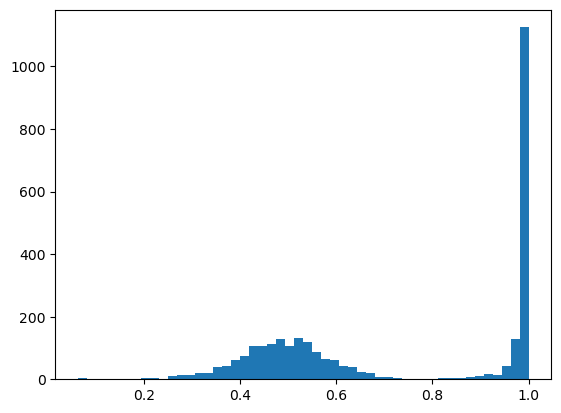

In [156]:
_ = plt.hist(vafs, bins=50)

In [30]:
vcfspec = Vcfspec('1', 55249, 'C', ('CTATGG',), refver='hg19')
# vcfspec = Vcfspec('1', 55299, 'C', ('T',), refver='hg19')

In [31]:
vp = VariantPlus.from_vcfspec(vcfspec)
vp.create_readstats(bam_dict=bam_dict)

In [21]:
vp.show_igv(igv, bam_dict=bam_dict)

OK
OK
OK
OK
OK
OK
OK
OK


In [32]:
vp.get_vaf('normal')

0.36231884057971014

In [33]:
germlinefilter.check_show(vp, 'normal')

True    <DiffMeanBQFilter ({'cutoff': -5})>
True    <AbsMeanBQFilter ({'cutoff': 20})>
True    <DiffMeanMQFilter ({'cutoff': -10})>
False    <AbsMeanMQFilter ({'cutoff': 45})>
True    <ClipoverlapFilter ({'cutoff': 2.0})>
True    <CliplenFilter ({'cutoff': 20})>
True    <ReadcountFilter ({'cutoff': 2})>
True    <OthercountRatioFilter ({'cutoff': 1.5, 'ref_length_cutoff': None})>
True    <TotaldepthGTFilter ({'cutoff': 10})>
True    <VarposUniformFilter ({'cutoff': 0.01})>


In [34]:
vp.readstats_dict['normal']

<ReadStats(
    {'rppcounts': {None: 3, -1: 0, 0: 44, 1: 25, 'softclip_overlap': 2},
     'mean_BQs': {None: 6.0, -1: nan, 0: 25.727272727272727, 1: 27.973333333333333},
     'median_BQs': {None: 6.0, -1: nan, 0: 27.0, 1: 27.0},
     'mean_MQs': {None: 52.0, -1: nan, 0: 43.71590909090909, 1: 38.44},
     'median_MQs': {None: 50.0, -1: nan, 0: 50.0, 1: 50.0},
     'mean_cliplens': {None: 14.333333333333334, -1: nan, 0: 1.25, 1: 0.56},
     'median_cliplens': {None: 7.0, -1: nan, 0: 0.0, 1: 0.0},
     'mNM': {None: 6.666666666666667, -1: 0, 0: 2.5, 1: 1.4},
     'recurrent_mNM': {None: 0, -1: 0, 0: 1, 1: 4},
     'pairorient_pvalues': {None: 1.0,
                            -1: nan,
                            0: 0.17417114727072658,
                            1: 0.42435622215270996},
     'readorient_pvalues': {None: 1.0, -1: nan, 0: 1.0, 1: 1.0},
     'varpos_uniform_pvalues': {None: 0.07947019867549665,
                                -1: nan,
                                0: 0.190

In [ ]:
import handygenome.variant.filter as libfilter
germlinefilter = libfilter.get_preset_filter_germline(with_pon=False)

def vpfilter(vp):
    # vaf = vp.get_vaf('LU-14_normal', allele_index=1)
    return (
        germlinefilter.check(vp, sampleid='normal', allele_index=1)
        # and (vaf > 0.3)
        # and (vaf < 0.7)
    )

# Multiprocessing

In [42]:
import multiprocessing as mp

In [43]:
manager = mp.Manager()

In [74]:
sl = manager.list()

In [79]:
print(sl)

[]


In [78]:
def target(sl):
    sl.append(('1', 123, 'A', ('C',)))
    print('hello')

In [80]:
proc = mp.Process(target=target, args=(sl,))
proc.start()
proc.join()

hello


In [81]:
print(sl)

[('1', 123, 'A', ('C',))]


In [87]:
A = 10
B = 20
def target(x, A, B):
    return (x, A, B)

with mp.Pool(3) as p:
    result = p.starmap(target, [(x, A, B) for x in range(5)])
print(result)

[(0, 10, 20), (1, 10, 20), (2, 10, 20), (3, 10, 20), (4, 10, 20)]


In [90]:
A = 10
B = 20
def target(x):
    return (x, A, B)

iterable = (x for x in range(5))

with mp.Pool(3) as p:
    result = p.map(target, iterable)
print(result)

[(0, 10, 20), (1, 10, 20), (2, 10, 20), (3, 10, 20), (4, 10, 20)]


In [325]:
import handygenome.variant.varianthandler as varianthandler

In [326]:
baf_vcf_path = '/home/users/team_projects/Lung_Cancer_Panel_data/03_Data_from_YTKim/06_haplotypecaller/annotation_230126/LU-14.readstats.het_filtered.tumorannot.vcf.gz'

In [327]:
vr = next(pysam.VariantFile(baf_vcf_path).fetch())

In [336]:
vr_data = varianthandler.encode_vr(vr)

In [ ]:
new_vr = varianthandler.decode_vr(vr_data)

[W::vcf_parse] Contig '1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse_info] INFO 'AC' is not defined in the header, assuming Type=String
[W::vcf_parse_info] INFO 'AF' is not defined in the header, assuming Type=String
[W::vcf_parse_info] INFO 'AN' is not defined in the header, assuming Type=String
[W::vcf_parse_info] INFO 'BaseQRankSum' is not defined in the header, assuming Type=String
[W::vcf_parse_info] INFO 'DP' is not defined in the header, assuming Type=String
[W::vcf_parse_info] INFO 'ExcessHet' is not defined in the header, assuming Type=String
[W::vcf_parse_info] INFO 'FS' is not defined in the header, assuming Type=String
[W::vcf_parse_info] INFO 'MLEAC' is not defined in the header, assuming Type=String
[W::vcf_parse_info] INFO 'MLEAF' is not defined in the header, assuming Type=String
[W::vcf_parse_info] INFO 'MQ' is not defined in the header, assuming Type=String
[W::vcf_parse_info] INFO 'MQRankSum' is not defined in the heade

# pyranges_helper join

In [319]:
left_nrow = 50000
right_nrow = 25000

left_df = pd.DataFrame.from_dict({
    'Chromosome': pd.Categorical(np.random.choice([str(x) for x in range(1, 6)], left_nrow)),
    'Start': np.random.randint(0, 10000, left_nrow),
    'End': np.random.randint(15000, 30000, left_nrow),
    'val1': np.random.normal(0, 1, left_nrow),
    'val2': np.random.normal(0, 1, left_nrow),
})
left_gr = pr.PyRanges(left_df)

right_df = pd.DataFrame.from_dict({
    'Chromosome': pd.Categorical(np.random.choice([str(x) for x in range(1, 5)], right_nrow)),
    'Start': np.random.randint(23000, 33000, right_nrow),
    'End': np.random.randint(50000, 60000, right_nrow),
    'val3': np.random.normal(0, 1, right_nrow),
    'val4': np.random.normal(0, 1, right_nrow),
})
right_gr = pr.PyRanges(right_df)

In [322]:
left_df = pd.DataFrame.from_dict({
    'Chromosome': ['1', '1', '1'],
    'Start': [0, 10, 100],
    'End': [10, 25, 150],
    'val1': [0.1, 0.24, 3.5],
})
left_gr = pr.PyRanges(left_df)

right_df = pd.DataFrame.from_dict({
    'Chromosome': ['1', '1', '1'],
    'Start': [5, 24, 120],
    'End': [8, 30, 150],
    'val2': [10, 55, 20],
})
right_gr = pr.PyRanges(right_df)

In [323]:
joined_df = perfcheck(pyranges_helper.join_newest, left_df, right_df, how='left', merge='mean')
print(joined_df)

Grouping dataframes by chromosome
Doing join by chromosome
chrom 1
Comparing coordinates
Subsetting right df
Doing merge
Joining with left df
Concatenating dataframes of all chromosomes
0.005746753886342049 sec
  Chromosome  Start  End  val1  val2
0          1      0   10  0.10  10.0
1          1     10   25  0.24  55.0
2          1    100  150  3.50  20.0
